In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [44]:
df = pd.read_csv('/Users/haricharan/Downloads/clustering/dataset/few ext.csv')

In [45]:
df.columns

Index(['Unnamed: 0', 'Vehicle No', 'SENSOR_ID', 'I Batt High (A)',
       'I Batt Low (A)', 'SOH COR', 'Voltage (V)', 'I_Batt_Total', 'SOC (%)',
       'Ri', 'SOH SUL', 'SOH_LAM', 'Temperature (°C)', 'SOC (%).1'],
      dtype='object')

In [46]:
df.drop('Unnamed: 0' , axis=1, inplace = True)
vehicleno=df['Vehicle No']
sensorid=df['SENSOR_ID']
df.drop('Vehicle No' , axis=1, inplace = True)
df.drop('SENSOR_ID' , axis=1, inplace = True)

In [47]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1','P2'] 
X_principal.head(1)

P1        P2
0  0.69174  0.433266

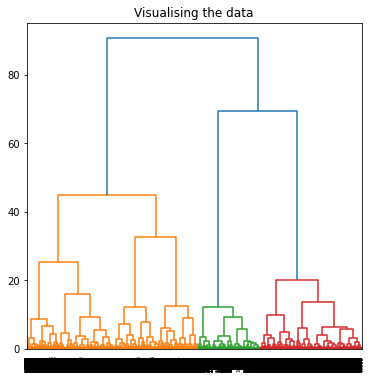

In [48]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

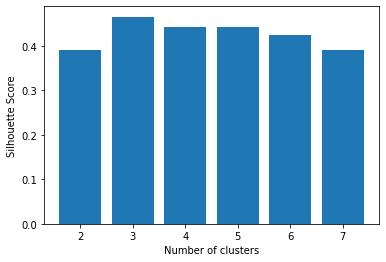

In [49]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [50]:
max_value = max(silhouette_scores)
max_index =  silhouette_scores.index(max_value)

In [51]:
agg = AgglomerativeClustering(n_clusters=k[max_index])
cluster_labels=agg.fit_predict(X_principal)

In [52]:
x=pd.DataFrame()
x['clusterlabels']=cluster_labels

In [53]:
df1 = pd.DataFrame()
df1=pd.concat([vehicleno,sensorid,df,x],axis=1)

In [54]:
df1.to_csv('clustered data.csv')

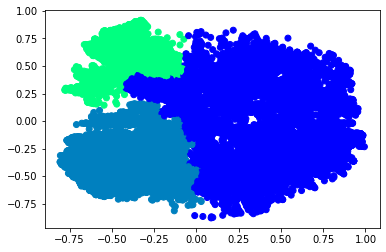

In [55]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = k[max_index]).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 